# 使用MMClasification训练花朵数据集

## 安装 MMClassification

在使用 MMClassification 之前，我们需要配置环境，步骤如下：

- 安装 Python, CUDA, C/C++ compiler 和 git
- 安装 PyTorch (CUDA 版)
- 安装 mmcv
- 克隆 mmcls github 代码库然后安装

因为我们在 Google Colab 进行实验，Colab 已经帮我们完成了基本的配置，我们可以直接跳过前面两个步骤 。

### 检查环境

In [1]:
%cd /content

/content


In [3]:
!pwd

/content


In [4]:
# 检查 nvcc 版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [5]:
# 检查 PyTorch 的安装情况
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.13.1+cu116
True


### 安装 MMCV

MMCV 是 OpenMMLab 代码库的基础库。Linux 环境的安装 whl 包已经提前打包好，大家可以直接下载安装。

需要注意 PyTorch 和 CUDA 版本，确保能够正常安装。

在前面的步骤中，我们输出了环境中 CUDA 和 PyTorch 的版本，分别是 11.1 和 1.9.0，我们需要选择相应的 MMCV 版本。

另外，也可以安装完整版的 MMCV-full，它包含所有的特性以及丰富的开箱即用的 CUDA 算子。需要注意的是完整版本可能需要更长时间来编译。

In [6]:
# 安装 mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.9.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 KB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 23.4 MB/s eta 0:00:00
  Created wheel for mmcv: filename=mmcv-1.7.1-py2.py3-none-any.whl size=930735 sha256=2543979aed61d1f637da58d1682f1d480ae83a507908afe5b09bcf757303a56c
  Stored in directory: /root/.cache/pip/wheels/74/0c/f4/cafa17bca99a907f0ea624325aec45e905dd44884a47eae0bf
Successfully built mmcv


### 克隆并安装 MMClassification

接着，我们从 github 上克隆下 mmcls 最新代码库并进行安装。

In [7]:
# 下载 mmcls 代码库
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# 从源码安装 MMClassification
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 12268, done.
remote: Total 12268 (delta 0), reused 0 (delta 0), pack-reused 12268
Receiving objects: 100% (12268/12268), 11.34 MiB | 34.27 MiB/s, done.
Resolving deltas: 100% (8510/8510), done.
/content/mmclassification
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmclassification
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmcls


In [8]:
# 检查 MMClassification 的安装情况
import mmcls
print(mmcls.__version__)

0.25.0


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## 使用 Python API 进行模型微调

模型微调是将预训练好的模型在特定的数据集上对模型参数进行非常精细调整的过程，最终让预训练的模型能够适配新的数据集及对应的任务。相比于模型的训练过程，模型微调大大降低了训练的时间，并减少了数据量很小的数据集在训练过程中会出现的过拟合问题。

模型微调的基本步骤如下：

1. 准备新数据集并满足 MMClassification 的要求
2. 根据数据集修改训练配置 
3. 进行训练和验证

更多细节可以查看 [文档](https://mmclassification.readthedocs.io/zh_CN/latest/tutorials/finetune.html).

In [14]:
!mkdir data
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/flower.zip -O data/flower.zip

mkdir: cannot create directory ‘data’: File exists
--2023-02-05 02:47:22--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/flower.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230662310 (220M) [application/zip]
Saving to: ‘data/flower.zip’

data/flower.zip     100%[===================>] 219.98M  13.2MB/s    in 19s     

2023-02-05 02:47:42 (11.6 MB/s) - ‘data/flower.zip’ saved [230662310/230662310]



In [15]:
%ls

CITATION.cff     demo/    MANIFEST.in      README.md         resources/  tools/
configs/         docker/  mmcls/           README_zh-CN.md   setup.cfg
CONTRIBUTING.md  docs/    mmcls.egg-info/  requirements/     setup.py
data/            LICENSE  model-index.yml  requirements.txt  tests/


In [16]:
# 解压
!unzip data/flower.zip -d data >> /dev/null

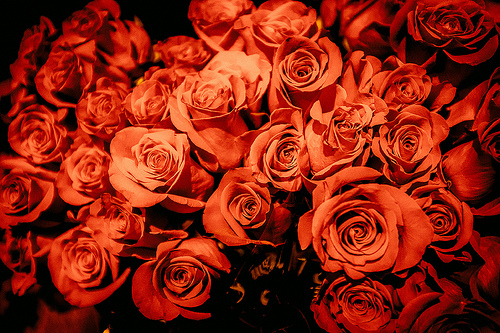

In [27]:
from PIL import Image
Image.open('data/flower/test/rose/10503217854_e66a804309.jpg')

In [18]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/configs/mobilenet_v2_1x_flower.py -O configs/mobilenet_v2/mobilenet_v2_1x_flower.py

--2023-02-05 02:57:53--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/configs/mobilenet_v2_1x_flower.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1975 (1.9K) [binary/octet-stream]
Saving to: ‘configs/mobilenet_v2/mobilenet_v2_1x_flower.py’

configs/mobilenet_v 100%[===================>]   1.93K  --.-KB/s    in 0.003s  

2023-02-05 02:57:54 (682 KB/s) - ‘configs/mobilenet_v2/mobilenet_v2_1x_flower.py’ saved [1975/1975]



## 命令行-训练

In [20]:
!python tools/train.py \
        configs/mobilenet_v2/mobilenet_v2_1x_flower.py \
        --work-dir work_dirs/mobilenet_v2_1x_flower

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mmcv/cnn/bricks/transformer.py:33: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/content/mmclassification/mmcls/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application a

## 用训练得到的图像分类模型，对新图像预测

In [23]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device', device)

device cuda:0


load checkpoint from local path: work_dirs/mobilenet_v2_1x_flower/latest.pth
类别 rose 置信度 0.9451267123222351


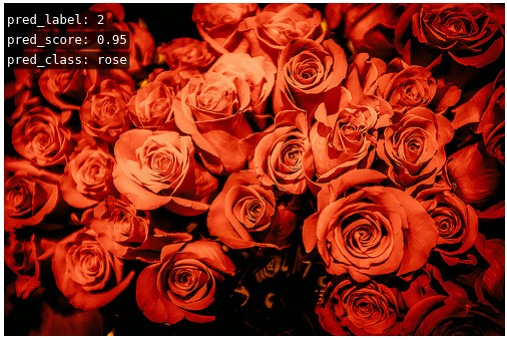

In [26]:
import matplotlib.pyplot as plt
import mmcv
from mmcls.apis import inference_model, init_model, show_result_pyplot

img = mmcv.imread('data/flower/test/rose/10503217854_e66a804309.jpg')
# img = mmcv.imread('data/cat2.jpg')


# 图像分类模型 config 配置文件
config_file = 'configs/mobilenet_v2/mobilenet_v2_1x_flower.py'
# 图像分类模型 checkpoint 权重文件
checkpoint_file = 'work_dirs/mobilenet_v2_1x_flower/latest.pth'
# 通过 config 配置文件 和 checkpoint 权重文件 构建模型
model = init_model(config_file, checkpoint_file, device=device)

result = inference_model(model, img)
print('类别', result['pred_class'], '置信度', result['pred_score'])

show_result_pyplot(model, img, result)

## 将训练得到的模型在测试集上预测，获得所有测试集数据的预测结果

In [25]:
!python tools/test.py \
        configs/mobilenet_v2/mobilenet_v2_1x_flower.py \
        work_dirs/mobilenet_v2_1x_flower/latest.pth \
        --out testset_result.json

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mmcv/cnn/bricks/transformer.py:33: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/content/mmclassification/mmcls/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application a

## 将训练得到的模型在测试集上预测，获得图像分类评估结果

In [28]:
!python tools/test.py \
        configs/mobilenet_v2/mobilenet_v2_1x_flower.py \
        work_dirs/mobilenet_v2_1x_flower/latest.pth \
        --metrics accuracy precision recall f1_score support \
        --metric-options topk=1

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mmcv/cnn/bricks/transformer.py:33: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/content/mmclassification/mmcls/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application a